In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!pip install --upgrade scikit-learn # Upgrade scikit-learn to the latest version
!pip uninstall -y numpy
!pip install numpy

!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade sklearn
!pip install --upgrade scipy
!pip install --upgrade imblearn
!pip install --upgrade catboost
!pip install --upgrade xgboost
!pip install --upgrade numpy==1.23
!pip install scikit-learn==1.1.3

#import sklearn
#print(sklearn.__version__) # Verify the installed version

# for EDA
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick
# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif,f_regression, f_classif, chi2
# feature scaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# for fixing the imbalanced dataset and split
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# for model evaluation
from sklearn.metrics import accuracy_score, roc_auc_score,mean_squared_error
from sklearn.metrics import confusion_matrix, RocCurveDisplay,classification_report # Use RocCurveDisplay instead of plot_roc_curve

# models selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB # Import GaussianNB class

# for the gridsearch
from sklearn.model_selection import GridSearchCV

In [ ]:
# loading data
df1 = pd.read_csv('/content/drive/My Drive/diabetes_binary_5050.csv')
df2 = pd.read_csv('/content/drive/My Drive/diabetes_binary.csv')

print('df1 shape is: {}'.format(df1.shape))
print('df2 shape is: {}'.format(df2.shape))

In [ ]:
#describing the dataset
df2.head()
df2.info()

In [ ]:
# checking if there missing values
df2.isna().sum()
df2.describe()

#checking for duplicates
duplicates = df2[df2.duplicated()]
num_duplicates = len(duplicates)
print(f"Number of Duplicate Rows: {num_duplicates}")
duplicates.head()

def data_clean(dataframe):
    # Define bins and labels for BMI categorization
    bins = [0, 18.5, 24.9, 29.9, float('inf')]
    labels = [1, 2, 3, 4]

    # Drop duplicates and assign BMI bins
    df = dataframe.drop_duplicates().assign(BMI_bins=dataframe['BMI'].pipe(pd.cut, bins=bins, labels=labels))

    # Reset the index and convert data types
    df = df.reset_index(drop=True).astype({'Diabetes_binary': 'uint8','HighBP': 'uint8',
    'HighChol': 'uint8',
    'CholCheck': 'uint8',
    'BMI': 'uint8',
    'Smoker': 'uint8',
    'Stroke': 'uint8',
    'HeartDiseaseorAttack': 'uint8',
    'PhysActivity': 'uint8',
    'Fruits': 'uint8',
    'Veggies': 'uint8',
    'HvyAlcoholConsump': 'uint8',
    'AnyHealthcare': 'uint8',
    'NoDocbcCost': 'uint8',
    'GenHlth': 'uint8',
    'MentHlth': 'uint8',
    'PhysHlth': 'uint8',
    'DiffWalk': 'uint8',
    'Sex': 'uint8',
    'Age': 'uint8',
    'Education': 'uint8',
    'Income': 'uint8',
    'BMI_bins': 'uint8'
    })

    return df # Indent all lines within the function

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install --upgrade scikit-learn # Upgrade scikit-learn to the latest version
!pip uninstall -y numpy
!pip install numpy

!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade sklearn
!pip install --upgrade scipy
!pip install --upgrade imblearn
!pip install --upgrade catboost
!pip install --upgrade xgboost
!pip install --upgrade numpy==1.23
!pip install scikit-learn==1.1.3

#import sklearn
#print(sklearn.__version__) # Verify the installed version

# for EDA
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick
# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif,f_regression, f_classif, chi2
# feature scaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# for fixing the imbalanced dataset and split
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# for model evaluation
from sklearn.metrics import accuracy_score, roc_auc_score,mean_squared_error
from sklearn.metrics import confusion_matrix, RocCurveDisplay,classification_report # Use RocCurveDisplay instead of plot_roc_curve

# models selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB # Import GaussianNB class

# for the gridsearch
from sklearn.model_selection import GridSearchCV

Found existing installation: numpy 1.23.0
Uninstalling numpy-1.23.0:
  Successfully uninstalled numpy-1.23.0
  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.0 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.0 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you have numpy 2.0.0 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.0 which is incompatible.
rmm-cu12 24.4.0 requires numpy<2.0a0,>=1.23, but you have numpy 

**Loading** **Dataset**

In [ ]:
# loading data
df1 = pd.read_csv('/content/drive/My Drive/diabetes_binary_5050.csv')
df2 = pd.read_csv('/content/drive/My Drive/diabetes_binary.csv')

print('df1 shape is: {}'.format(df1.shape))
print('df2 shape is: {}'.format(df2.shape))

df1 shape is: (70692, 22)
df2 shape is: (253680, 22)


 **Dataset** **Before** **Cleanup**

In [ ]:
#describing the dataset
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  


 **Data** **Preprocessing**

In [ ]:
# checking if there missing values
df2.isna().sum()
df2.describe()

#checking for duplicates
duplicates = df2[df2.duplicated()]
num_duplicates = len(duplicates)
print(f"Number of Duplicate Rows: {num_duplicates}")
duplicates.head()

def data_clean(dataframe):
    # Define bins and labels for BMI categorization
    bins = [0, 18.5, 24.9, 29.9, float('inf')]
    labels = [1, 2, 3, 4]

    # Drop duplicates and assign BMI bins
    df = dataframe.drop_duplicates().assign(BMI_bins=dataframe['BMI'].pipe(pd.cut, bins=bins, labels=labels))

    # Reset the index and convert data types
    df = df.reset_index(drop=True).astype({'Diabetes_binary': 'uint8','HighBP': 'uint8',
    'HighChol': 'uint8',
    'CholCheck': 'uint8',
    'BMI': 'uint8',
    'Smoker': 'uint8',
    'Stroke': 'uint8',
    'HeartDiseaseorAttack': 'uint8',
    'PhysActivity': 'uint8',
    'Fruits': 'uint8',
    'Veggies': 'uint8',
    'HvyAlcoholConsump': 'uint8',
    'AnyHealthcare': 'uint8',
    'NoDocbcCost': 'uint8',
    'GenHlth': 'uint8',
    'MentHlth': 'uint8',
    'PhysHlth': 'uint8',
    'DiffWalk': 'uint8',
    'Sex': 'uint8',
    'Age': 'uint8',
    'Education': 'uint8',
    'Income': 'uint8',
    'BMI_bins': 'uint8'
    })

    return df # Indent all lines within the function

**Dataset After Cleaning**

In [ ]:
#cleaned dataset df
df = data_clean(df2)
df1_clean = data_clean(df1)
df.info()

# Get a description for all columns in the dataframe without transposing
df.describe(include='all').T

#Grouping variables
# Define the target variable
target = 'Diabetes_binary'

# Identify boolean variables (binary) and numeric variables
bool_vars = df2.columns[df2.nunique() == 2].difference([target])
num_vars = [var for var in df2.columns if var not in bool_vars and var !=target]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  uint8
 1   HighBP                229474 non-null  uint8
 2   HighChol              229474 non-null  uint8
 3   CholCheck             229474 non-null  uint8
 4   BMI                   229474 non-null  uint8
 5   Smoker                229474 non-null  uint8
 6   Stroke                229474 non-null  uint8
 7   HeartDiseaseorAttack  229474 non-null  uint8
 8   PhysActivity          229474 non-null  uint8
 9   Fruits                229474 non-null  uint8
 10  Veggies               229474 non-null  uint8
 11  HvyAlcoholConsump     229474 non-null  uint8
 12  AnyHealthcare         229474 non-null  uint8
 13  NoDocbcCost           229474 non-null  uint8
 14  GenHlth               229474 non-null  uint8
 15  MentHlth              229474 non-n

# **Outlier Detection**

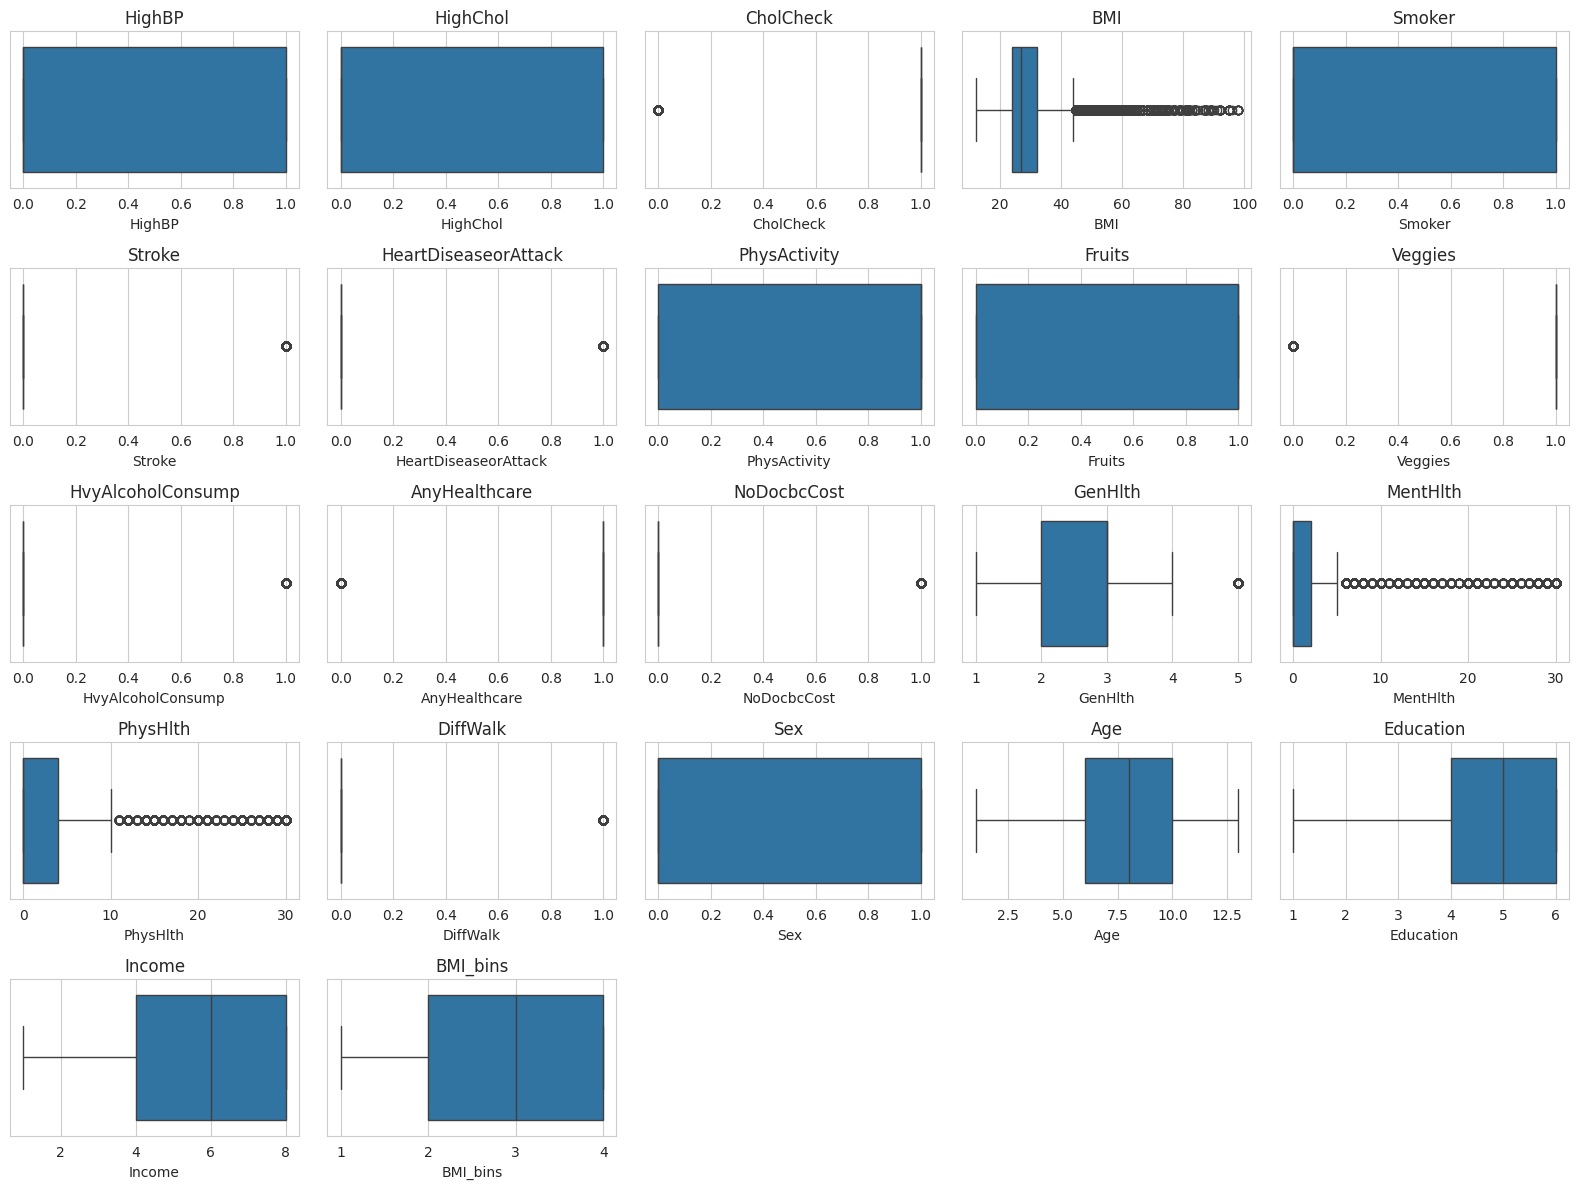

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = [
            'HighBP','HighChol','CholCheck','BMI','Smoker','Stroke',
            'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
            'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
            'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education',
            'Income','BMI_bins'
            ]

# Set the overall figure size
plt.figure(figsize=(16,12))
sns.set_style('whitegrid') # Replace ’ with '

# Make sure you have executed the code that creates the 'df' dataframe before running this cell.
# If 'df' is not defined, you need to run the cell where it is created.

# Loop through the features and create a subplot for each
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=feature, data=df)
    plt.title(feature)

plt.tight_layout() # Adjusts the plots to fit into the figure area nicely
plt.show()